###Importing Packages

In [2]:
# basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

###Assigning data to variable

In [4]:
data = pd.read_csv(r"/content/SampleSuperstore.csv")

###Previewing our Dataset

In [6]:
data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

###Cleaning And formating
Lets Start by checking if there are typos or noises of impossible values or errors of inconsistent values in our dataset

In [7]:
Cat = [i for i in data.columns if data.dtypes[i] == 'object']
for j in Cat:
    print('\033[95m' + j + '\033[0m')
    print(sorted(data[j].unique()))

Ship Mode
['First Class', 'Same Day', 'Second Class', 'Standard Class']
Segment
['Consumer', 'Corporate', 'Home Office']
Country
['United States']
City
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream'

In [8]:
data.dtypes.to_frame()

0
Ship Mode      object
Segment        object
Country        object
City           object
State          object
Postal Code     int64
Region         object
Category       object
Sub-Category   object
Sales         float64
Quantity        int64
Discount      float64
Profit        float64

###Colotr Palette For the notebook
I like to utilise colour schemes in my reports and chart representations, and "seaborn" offers a wide variety of colours. Let's assign the colour scheme to a variable so we can use it in our charts Click here for additional information on

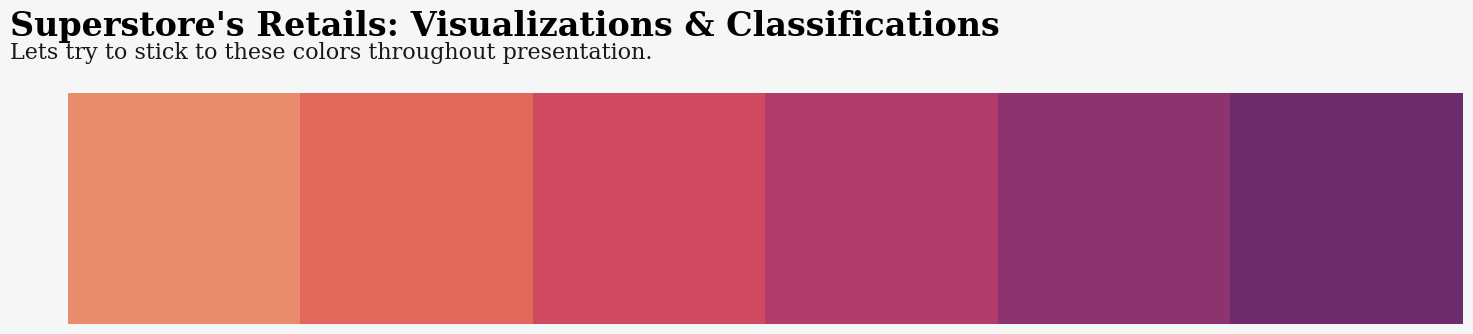

In [47]:
palette_color=sns.color_palette("flare")

sns.palplot(palette_color, size = 3)
plt.text(-0.75,-0.75, "Superstore's Retails: Visualizations & Classifications",{'font':'serif', 'size':24, 'weight':'bold'})
plt.text(-0.75,-0.65, 'Lets try to stick to these colors throughout presentation.',{'font':'serif', 'size':16},alpha = 0.9)
plt.gcf().set_facecolor('#f5f6f6')
plt.gcf().set_dpi(100)
plt.box(None)
plt.axis('off')
plt.show()

In [10]:
data.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

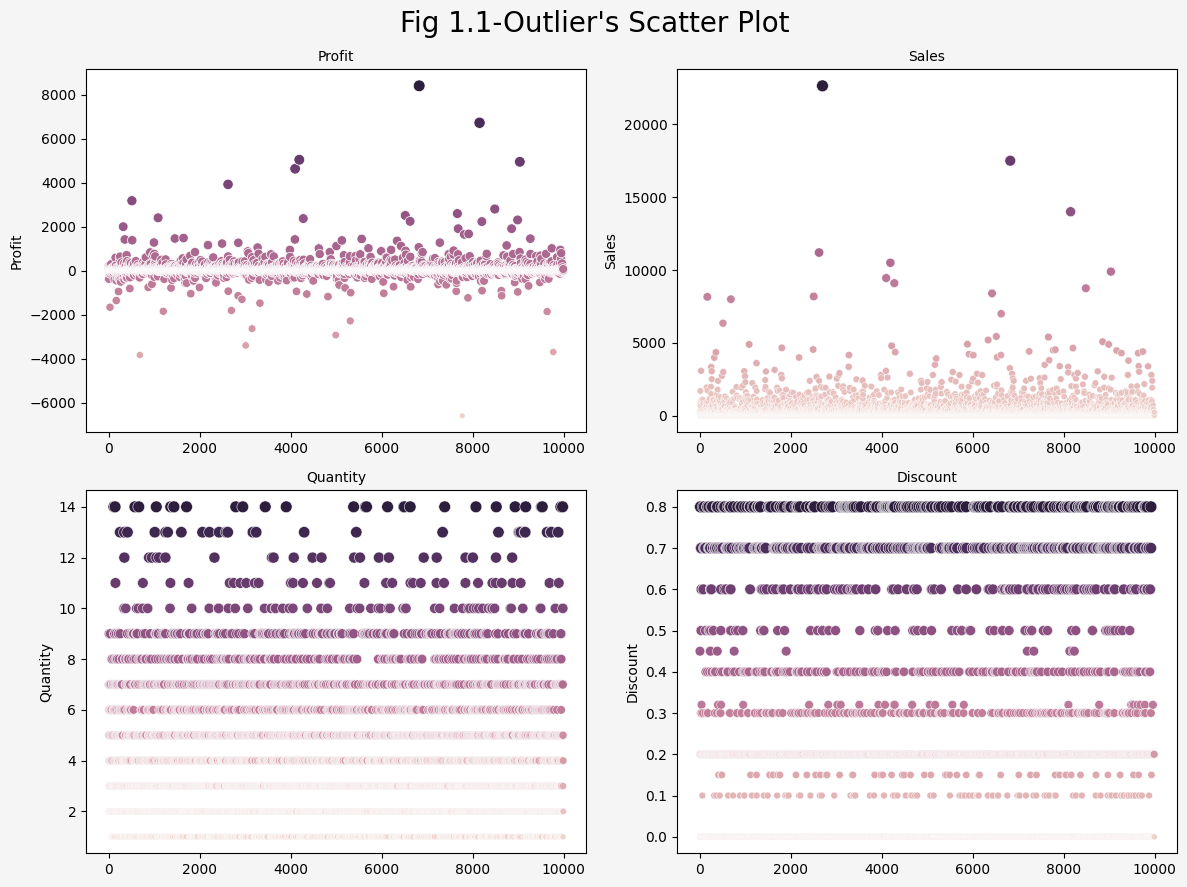

In [11]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9));
fig.patch.set_facecolor('#f6f5f5')
sns.scatterplot(data = data,y="Profit", x = data.index, ax = axs[0][0],hue = "Profit", size = "Profit" , legend = False)
axs[0][0].set_title('Profit', fontsize = 10)

sns.scatterplot(data=data, y ="Sales", x = data.index, ax = axs[0][1], hue ="Sales", size = "Sales" , legend=False)
axs[0][1].set_title('Sales', fontsize = 10)

sns.scatterplot(data=data, y = "Quantity", x = data.index, ax = axs[1][0], hue = "Quantity", size = "Quantity", legend=False)
axs[1][0].set_title('Quantity', fontsize = 10)

sns.scatterplot(data= data, y = "Discount", x = data.index, ax = axs[1][1], hue = "Discount", size = "Discount", legend=False)
axs[1][1].set_title('Discount', fontsize = 10)
plt.suptitle("Fig 1.1-Outlier's Scatter Plot",fontsize = 20)


plt.tight_layout()

The total number of records containing outliers = 2869
The outliers forms 28.71% of superstore's dataset


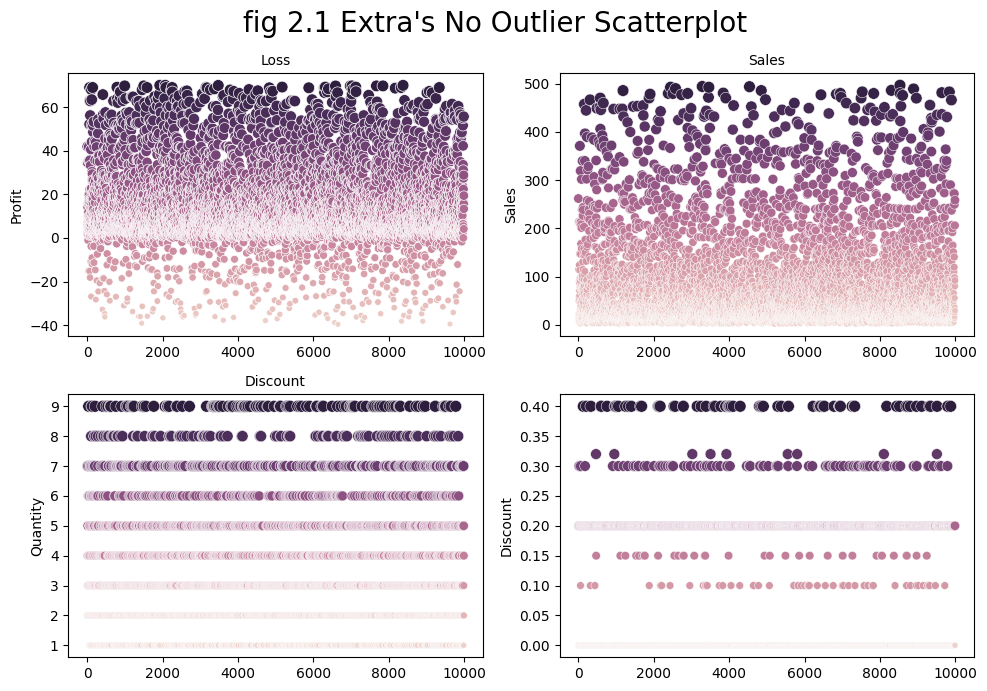

In [12]:
data_outliers = data[data["Profit"]<70]; data_outliers = data_outliers[data_outliers["Profit"]>-40]
data_outliers = data_outliers[data["Sales"]<498.93] ; data_outliers = data_outliers[data_outliers["Quantity"]<9.5]
data_outliers = data_outliers[data_outliers["Discount"]<0.5]


print(f"The total number of records containing outliers = {data.shape[0]-data_outliers.shape[0]}\nThe outliers forms {round((data.shape[0]-data_outliers.shape[0])/data.shape[0]*100,2)}% of superstore's dataset")

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));

sns.scatterplot(data=data_outliers, y = "Profit", x = data_outliers.index, ax = axs[0][0], hue="Profit", size="Profit", legend=False)
sns.scatterplot(data=data_outliers, y = "Sales", x = data_outliers.index, ax = axs[0][1], hue ="Sales", size ="Sales", legend=False)
sns.scatterplot(data=data_outliers,y = "Quantity",x = data_outliers.index, ax = axs[1][0], hue = "Quantity", size ="Quantity", legend=False)
sns.scatterplot(data=data_outliers,y = "Discount",x = data_outliers.index, ax = axs[1][1], hue = "Discount", size = "Discount", legend=False)
axs[0][0].set_title('Loss', fontsize = 10)
axs[0][1].set_title('Sales', fontsize = 10)
axs[1][0].set_title('Quantity', fontsize = 10)
axs[1][0].set_title('Discount', fontsize = 10)
plt.suptitle("fig 2.1 Extra's No Outlier Scatterplot",fontsize=20)
plt.tight_layout()

In [13]:
clean_data=data.drop(['Country','Postal Code'], axis=1)

In [14]:
print(f"Number of duplicate recocrds present in the dataset = {clean_data.duplicated().sum()}")

Number of duplicate recocrds present in the dataset = 50


In [15]:
clean_data.drop_duplicates(inplace=True)

In [16]:
# Unit Profit calculation
clean_data['Unit Price'] = clean_data.Sales / clean_data.Quantity

# Unit Profit calculation
clean_data['Unit Profit'] = clean_data.Profit / clean_data.Quantity

In [17]:
clean_data

Ship Mode    Segment             City       State Region  \
0       Second Class   Consumer        Henderson    Kentucky  South   
1       Second Class   Consumer        Henderson    Kentucky  South   
2       Second Class  Corporate      Los Angeles  California   West   
3     Standard Class   Consumer  Fort Lauderdale     Florida  South   
4     Standard Class   Consumer  Fort Lauderdale     Florida  South   
...              ...        ...              ...         ...    ...   
9989    Second Class   Consumer            Miami     Florida  South   
9990  Standard Class   Consumer       Costa Mesa  California   West   
9991  Standard Class   Consumer       Costa Mesa  California   West   
9992  Standard Class   Consumer       Costa Mesa  California   West   
9993    Second Class   Consumer      Westminster  California   West   

             Category Sub-Category     Sales  Quantity  Discount    Profit  \
0           Furniture    Bookcases  261.9600         2      0.00   41.9136   
1           Furniture       Chairs  731.9400         3      0.00  219.5820   
2     Office Supplies       Labels   14.6200         2      0.00    6.8714   
3           Furniture       Tables  957.5775         5      0.45 -383.0310   
4     Office Supplies      Storage   22.3680         2      0.20    2.5164   
...               ...          ...       ...       ...       ...       ...   
9989        Furniture  Furnishings   25.2480         3      0.20    4.1028   
9990        Furniture  Furnishings   91.9600         2      0.00   15.6332   
9991       Technology       Phones  258.5760         2      0.20   19.3932   
9992  Office Supplies        Paper   29.6000         4      0.00   13.3200   
9993  Office Supplies   Appliances  243.1600         2      0.00   72.9480   

      Unit Price  Unit Profit  
0       130.9800      20.9568  
1       243.9800      73.1940  
2         7.3100       3.4357  
3       191.5155     -76.6062  
4        11.1840       1.2582  
...          ...          ...  
9989      8.4160       1.3676  
9990     45.9800       7.8166  
9991    129.2880       9.6966  
9992      7.4000       3.3300  
9993    121.5800      36.4740  

[9944 rows x 13 columns]

In [18]:
clean_data.describe(include="all")

Ship Mode   Segment           City       State Region  \
count             9944      9944           9944        9944   9944   
unique               4         3            531          49      4   
top     Standard Class  Consumer  New York City  California   West   
freq              5930      5160            906        1980   3177   
mean               NaN       NaN            NaN         NaN    NaN   
std                NaN       NaN            NaN         NaN    NaN   
min                NaN       NaN            NaN         NaN    NaN   
25%                NaN       NaN            NaN         NaN    NaN   
50%                NaN       NaN            NaN         NaN    NaN   
75%                NaN       NaN            NaN         NaN    NaN   
max                NaN       NaN            NaN         NaN    NaN   

               Category Sub-Category         Sales     Quantity     Discount  \
count              9944         9944   9944.000000  9944.000000  9944.000000   
unique                3           17           NaN          NaN          NaN   
top     Office Supplies      Binders           NaN          NaN          NaN   
freq               5986         1518           NaN          NaN          NaN   
mean                NaN          NaN    230.752150     3.794047     0.156440   
std                 NaN          NaN    624.644765     2.228752     0.206584   
min                 NaN          NaN      0.444000     1.000000     0.000000   
25%                 NaN          NaN     17.340000     2.000000     0.000000   
50%                 NaN          NaN     55.000000     3.000000     0.200000   
75%                 NaN          NaN    210.104000     5.000000     0.200000   
max                 NaN          NaN  22638.480000    14.000000     0.800000   

             Profit   Unit Price  Unit Profit  
count   9944.000000  9944.000000  9944.000000  
unique          NaN          NaN          NaN  
top             NaN          NaN          NaN  
freq            NaN          NaN          NaN  
mean      28.770873    61.124538     7.828362  
std      234.841370   143.230314    56.213175  
min    -6599.978000     0.336000 -1319.995600  
25%        1.724800     5.492000     0.719100  
50%        8.679950    16.360000     2.766400  
75%       29.534700    63.980000     8.798900  
max     8399.976000  3773.080000  1679.995200

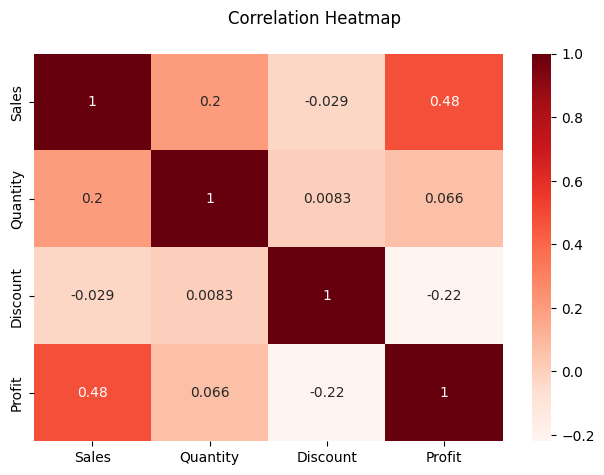

In [27]:
#for easy readablity for biggners
cmap=clean_data.drop(["Unit Price","Unit Profit"],axis=1)
cmap["Profit"]=cmap["Profit"]
sns.heatmap(cmap.corr(), cmap = 'Reds' ,annot = True)
plt.suptitle("Correlation Heatmap")
plt.tight_layout()

In [29]:
fig = px.scatter(clean_data,x="Profit",y="Sales",color="Discount",
                 size="Quantity",symbol="Segment",title="How diffrent factors affects Superstore's sales ")
fig.update_layout(height=600, width=800,
                  legend=dict(yanchor="top", y=0.99,
                              xanchor="left", x=0.01))
fig.show()

In [30]:
clean_data_loss = clean_data[clean_data.Profit<0].rename(columns={"Profit":"Loss"})
clean_data_loss.head()

Ship Mode      Segment             City         State   Region  \
3   Standard Class     Consumer  Fort Lauderdale       Florida    South   
14  Standard Class  Home Office       Fort Worth         Texas  Central   
15  Standard Class  Home Office       Fort Worth         Texas  Central   
23    Second Class     Consumer     Philadelphia  Pennsylvania     East   
27  Standard Class     Consumer     Philadelphia  Pennsylvania     East   

           Category Sub-Category      Sales  Quantity  Discount       Loss  \
3         Furniture       Tables   957.5775         5      0.45  -383.0310   
14  Office Supplies   Appliances    68.8100         5      0.80  -123.8580   
15  Office Supplies      Binders     2.5440         3      0.80    -3.8160   
23        Furniture       Chairs    71.3720         2      0.30    -1.0196   
27        Furniture    Bookcases  3083.4300         7      0.50 -1665.0522   

    Unit Price  Unit Profit  
3     191.5155     -76.6062  
14     13.7620     -24.7716  
15      0.8480      -1.2720  
23     35.6860      -0.5098  
27    440.4900    -237.8646

In [31]:
sales_discount=clean_data
sales_discount['whether_discount'] = sales_discount.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = sales_discount.groupby(['whether_discount']).mean()

def discount_plotter(data_type = 'total'):
    """Plots discount data related plots.
    Args:
        data_type- 'total' or 'average', depending on you want the average statistics or total stats.
    """
    color = ['rgb(107,44,107)', 'rgb(236,140,108)']
    if data_type == 'average':
        discount_data = sales_discount.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = sales_discount.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color),
            row=1, col=1
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data["Unit Price"], marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()


discount_plotter('average')
discount_plotter()

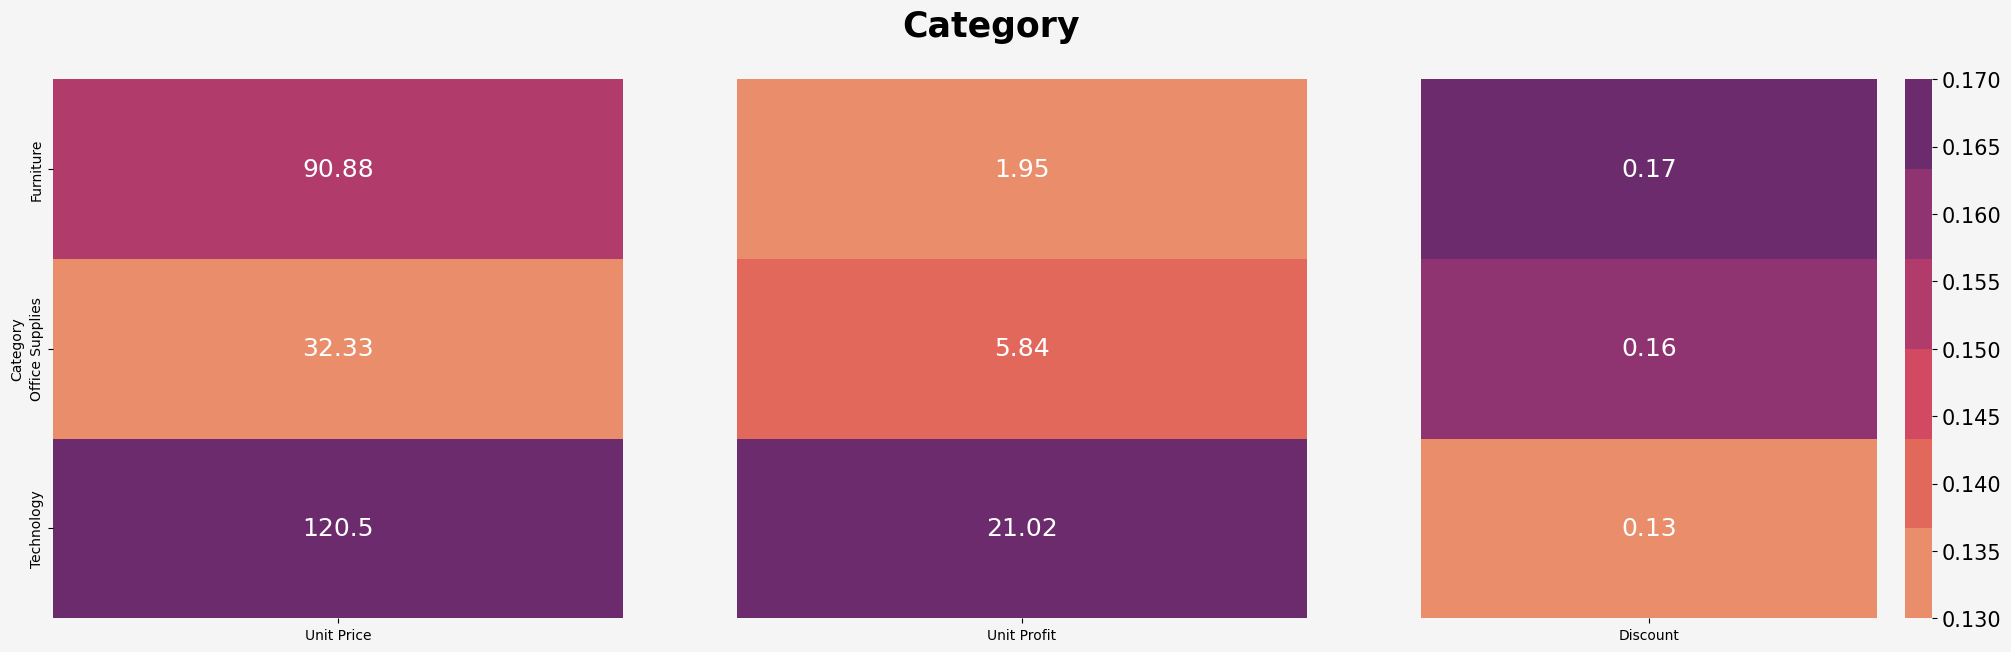

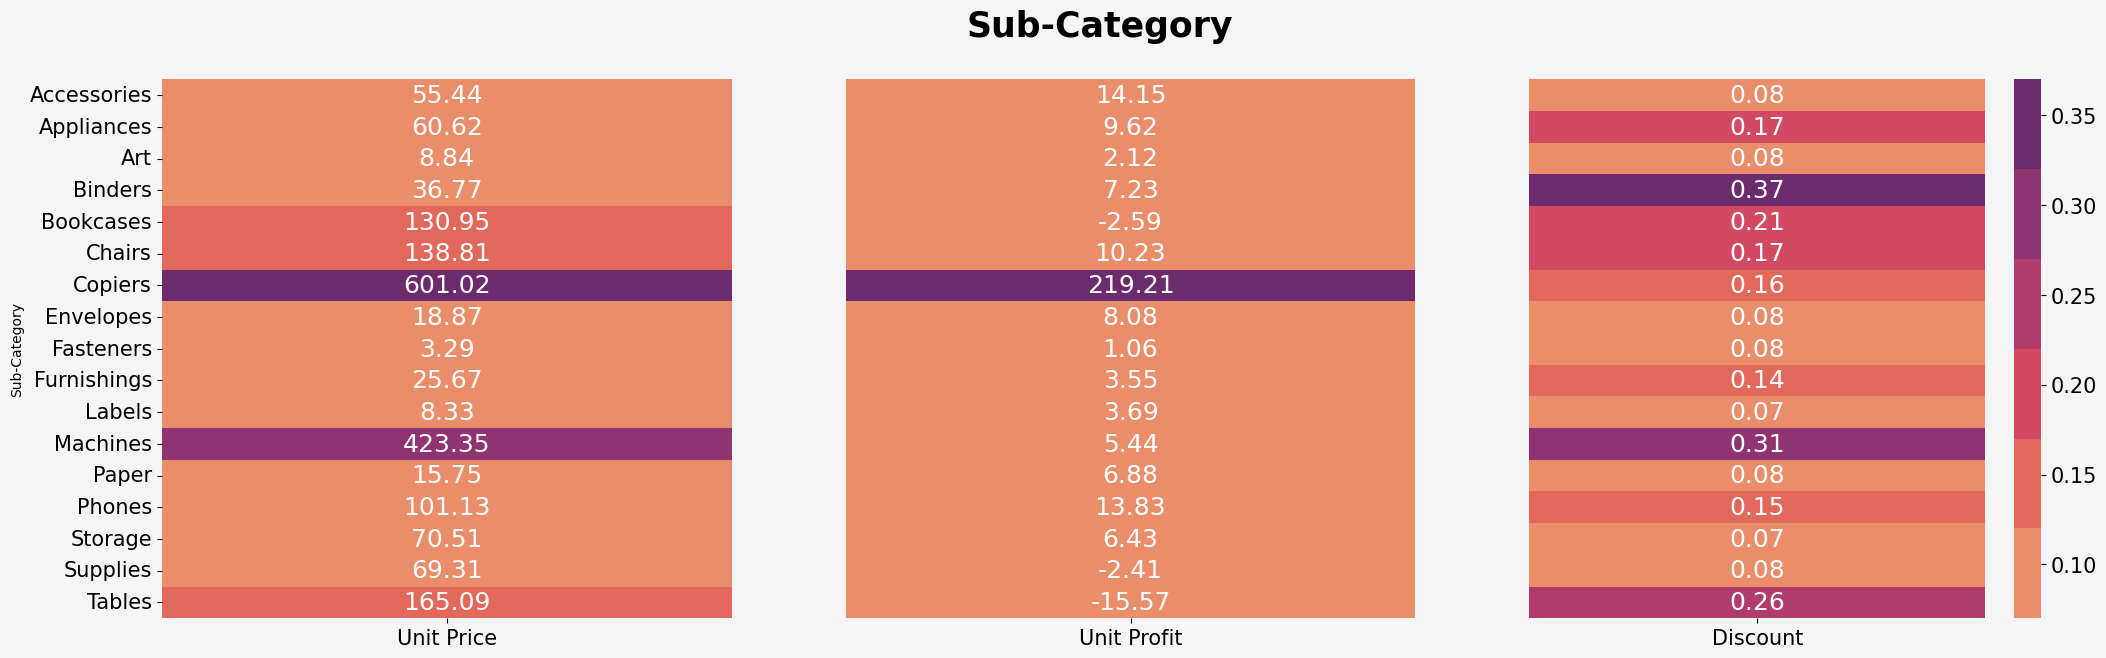

In [32]:
columns=["Category","Sub-Category"]
for column in columns:
    data_=clean_data.groupby(column)["Unit Price","Unit Profit","Discount"].mean().round(2)
    fig, ax = plt.subplots(1, 3, figsize = (25, 7))
    fig.patch.set_facecolor('#f6f5f5')
    fig.suptitle(column, fontsize = 25,weight="bold")
    ax_index = 0
    plt.rc('ytick', labelsize=15)
    plt.rc('xtick', labelsize=15)
    for plots in ["Unit Price","Unit Profit","Discount"]:
        plot_frame=data_.reindex(columns=[plots])
        if ax_index==2:
            sns.heatmap(plot_frame, ax=ax[ax_index], cbar=True, annot=True, fmt='2', annot_kws={'size':18},cmap=palette_color)
        else:
            sns.heatmap(plot_frame, ax=ax[ax_index], cbar=False, annot=True, fmt='2', annot_kws={'size':18},cmap=palette_color)


        if ax_index!=0:
            ax[ax_index].set(ylabel="")
            ax[ax_index].yaxis.set_visible(False)

        ax_index+=1

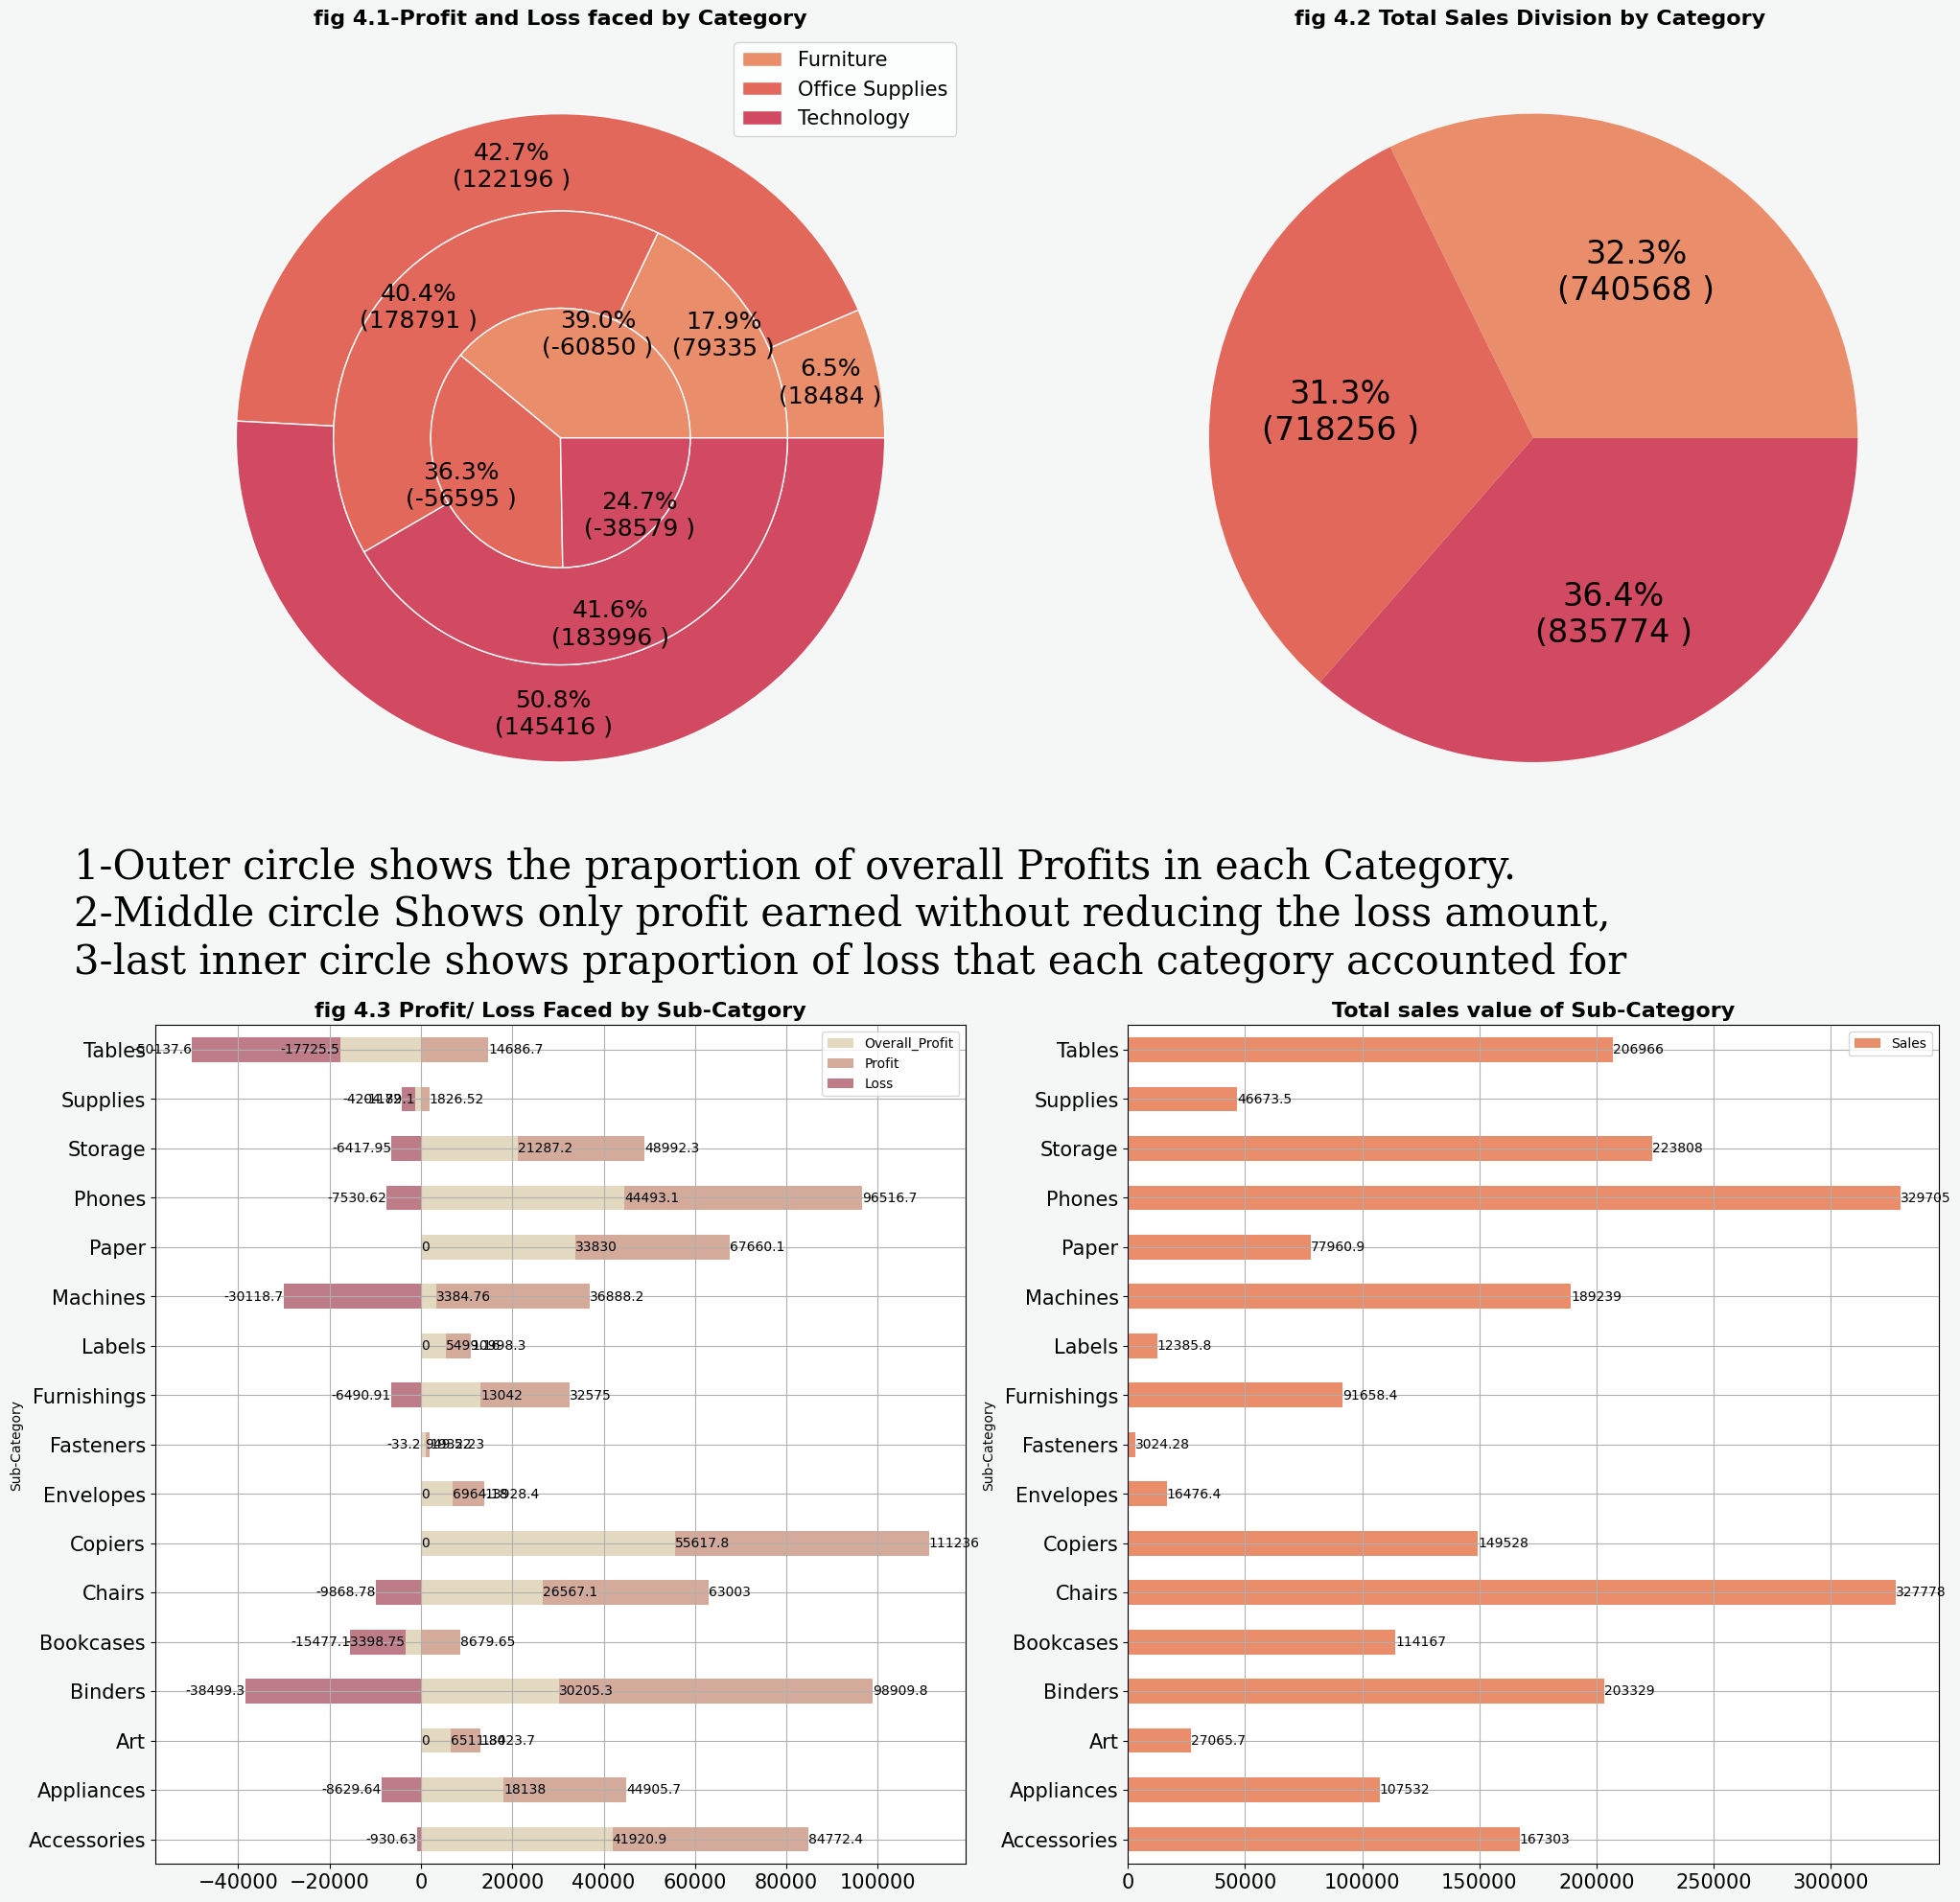

Empty DataFrame
Columns: [(Furniture, Bookcases), (Furniture, Chairs), (Furniture, Furnishings), (Furniture, Tables), (Office Supplies, Appliances), (Office Supplies, Art), (Office Supplies, Binders), (Office Supplies, Envelopes), (Office Supplies, Fasteners), (Office Supplies, Labels), (Office Supplies, Paper), (Office Supplies, Storage), (Office Supplies, Supplies), (Technology, Accessories), (Technology, Copiers), (Technology, Machines), (Technology, Phones)]
Index: []

In [33]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

cat=clean_data.groupby("Category")["Profit","Sales"].sum()
cat_p=clean_data[clean_data.Profit>0].groupby("Category")["Profit","Sales"].sum()
cat_l=clean_data_loss.groupby("Category")["Loss","Sales"].sum()

sub_cat=clean_data.groupby("Sub-Category")["Profit","Sales"].sum().rename(columns={"Profit":"Overall_Profit"}).round(2)
sub_cat_p=clean_data[clean_data.Profit>0].groupby("Sub-Category")["Profit"].sum().round(2)
sub_cat_l=clean_data_loss.groupby("Sub-Category")["Loss"].sum().round(2)
result_sub = pd.concat([sub_cat, sub_cat_p,sub_cat_l], axis=1)
result_sub.sort_values("Overall_Profit",ascending=True)
result_sub=result_sub.reset_index().fillna(0)
result=result_sub.drop("Sales",axis=1)


fig, axs = plt.subplots(2,2,figsize=(24,25))
plt.gcf().set_facecolor('#f5f6f6')

size=0.3
axs[0][0].pie(cat.Profit,radius=1,colors=palette_color,
             wedgeprops=dict(width=size, edgecolor='w'),
              textprops={'fontsize': 18},
              autopct=  lambda pct: func(pct, cat["Profit"]),
             pctdistance=(1-size/2))

axs[0][0].pie(cat_p.Profit,radius=1-size,colors=palette_color,
             wedgeprops=dict(width=size, edgecolor='w'),
              textprops={'fontsize': 18},
             autopct=  lambda pct: func(pct, cat_p["Profit"]),
             pctdistance=(1-size/2))

axs[0][0].pie(cat_l.Loss*-1,radius=1-size-size,colors=palette_color,
             wedgeprops=dict( edgecolor='w'),textprops={'fontsize': 18},
             autopct=  lambda pct: func(pct, cat_l["Loss"]),
             pctdistance=(1-size/2))

axs[0][0].legend(cat.index,fontsize=15)
axs[0][0].text(-1.50,-1.65, "1-Outer circle shows the praportion of overall Profits in each Category.\n2-Middle circle Shows only profit earned without reducing the loss amount,\n3-last inner circle shows praportion of loss that each category accounted for  ",{'font':'serif', 'size':30, 'weight':'normal'})
axs[0][0].set_title('fig 4.1-Profit and Loss faced by Category',fontsize=16,weight='bold')
axs[0][1].pie(cat.Sales,colors=palette_color,
              autopct=  lambda pct: func(pct, cat["Sales"]),
             textprops={'fontsize': 24})

axs[0][1].set_title('fig 4.2 Total Sales Division by Category ',fontsize=16,weight='bold')

result.plot(x="Sub-Category",kind = 'barh',color = sns.color_palette("ch:s=-.2,r=.6"), ax=axs[1][0],stacked=True)
result_sub[["Sub-Category","Sales"]].plot(x="Sub-Category",kind = 'barh',color = palette_color, ax=axs[1][1])
axs[1][0].set_title('fig 4.3 Profit/ Loss Faced by Sub-Catgory',fontsize=16,weight='bold')
axs[1][1].set_title('Total sales value of Sub-Category',fontsize=16,weight='bold')
axs[1][1].grid()
axs[1][0].grid()
for i in axs[1][0].containers:
            axs[1][0].bar_label(i,)
for i in axs[1][1].containers:
            axs[1][1].bar_label(i,)

plt.show()


tbl=clean_data.groupby(["Category","Sub-Category"]).count().reindex(columns=[])
tbl.T

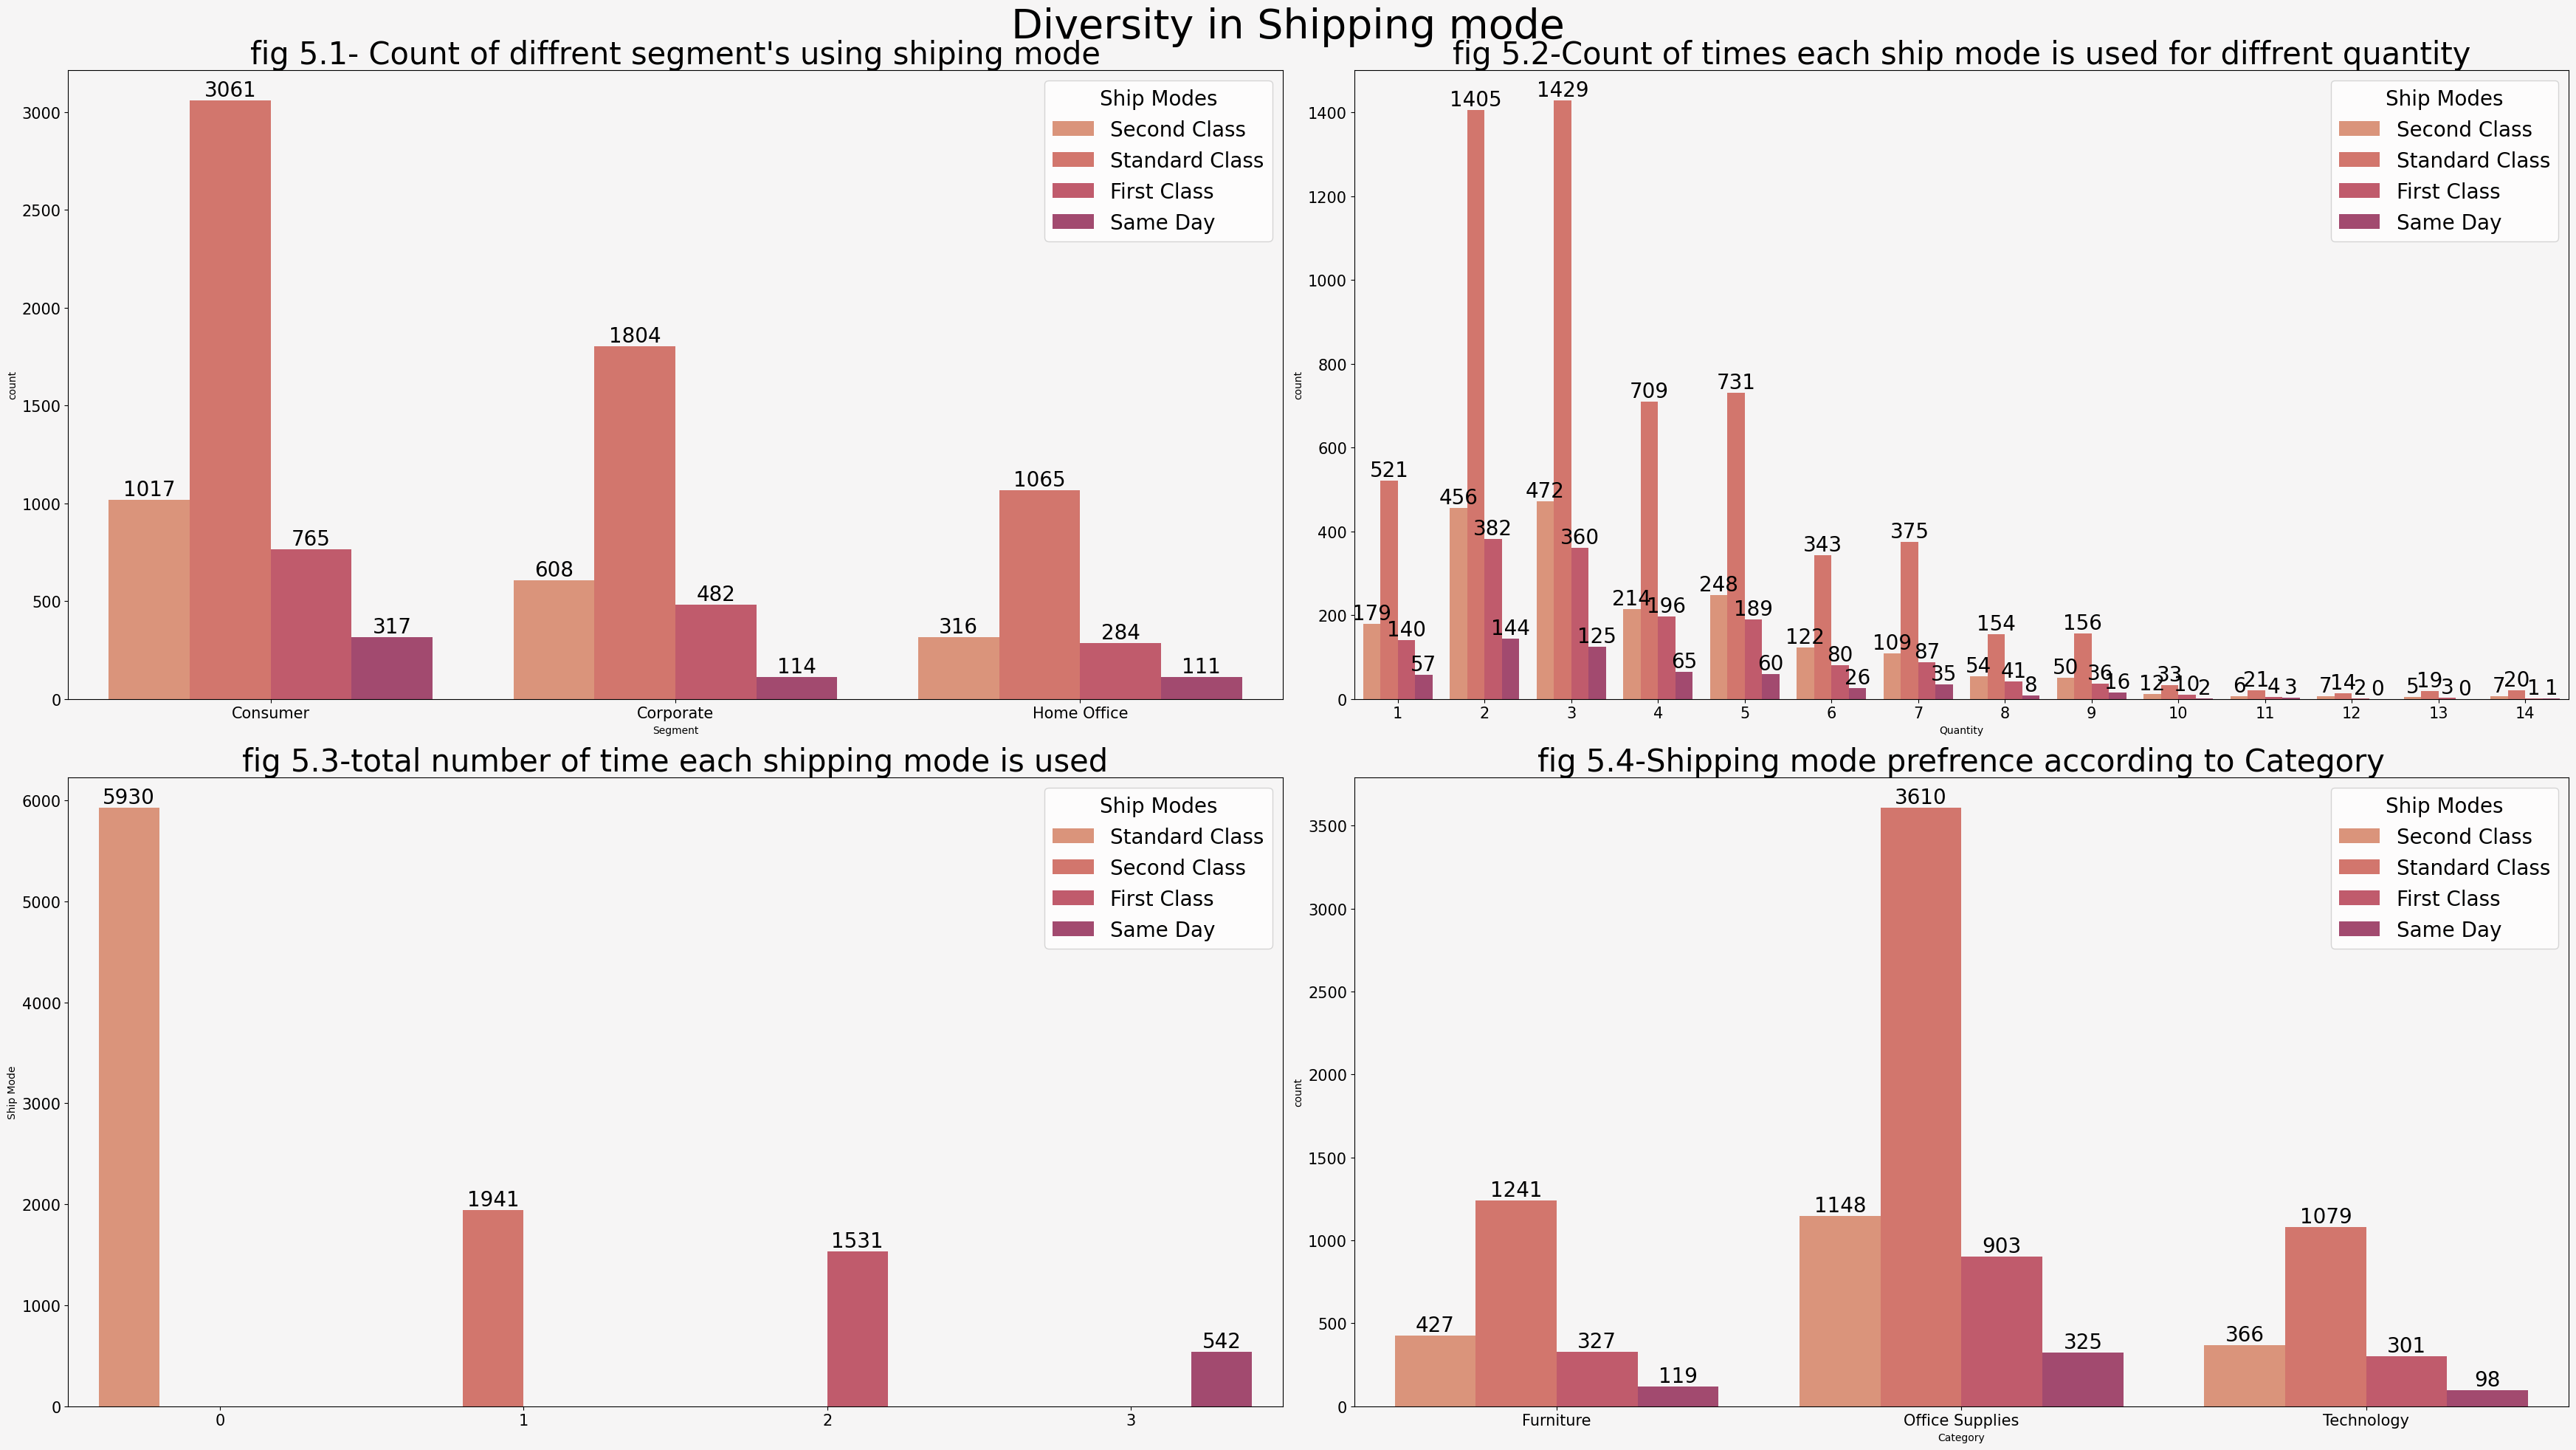

In [34]:
ship=ship=clean_data["Ship Mode"].value_counts().reset_index()
fig, axs = plt.subplots(2,2,figsize=(35,20))
fig.patch.set_facecolor('#f6f5f5')
sns.countplot(data=clean_data, x = "Segment",hue="Ship Mode", palette=palette_color,ax=axs[0][0])
sns.countplot(data=clean_data, x = "Quantity",hue="Ship Mode", palette=palette_color,ax=axs[0][1])
sns.barplot(data=ship, x = ship.index,y="Ship Mode",hue="index", palette=palette_color,ax=axs[1][0])
sns.countplot(data=clean_data,x="Category",hue="Ship Mode", palette=palette_color,ax=axs[1][1])

axs[0][0].set_title("fig 5.1- Count of diffrent segment's using shiping mode",fontsize=30)
axs[0][0].set_facecolor('#f6f5f5')

axs[0][1].set_title("fig 5.2-Count of times each ship mode is used for diffrent quantity",fontsize=30)
axs[0][1].set_facecolor('#f6f5f5')

axs[1][0].set_title("fig 5.3-total number of time each shipping mode is used",fontsize=30)
axs[1][0].set_facecolor('#f6f5f5')

axs[1][1].set_title("fig 5.4-Shipping mode prefrence according to Category",fontsize=30)
axs[1][1].set_facecolor('#f6f5f5')

for m in range(2):
    for n in range(2):
        axs[m][n].legend(fontsize = '11',
           title = 'Ship Modes', title_fontsize = '20',
           prop={'size': 20},
           loc="upper right")
        for i in axs[m][n].containers:
            axs[m][n].bar_label(i, fontsize=20)


plt.suptitle("Diversity in Shipping mode",fontsize=40)



plt.tight_layout()

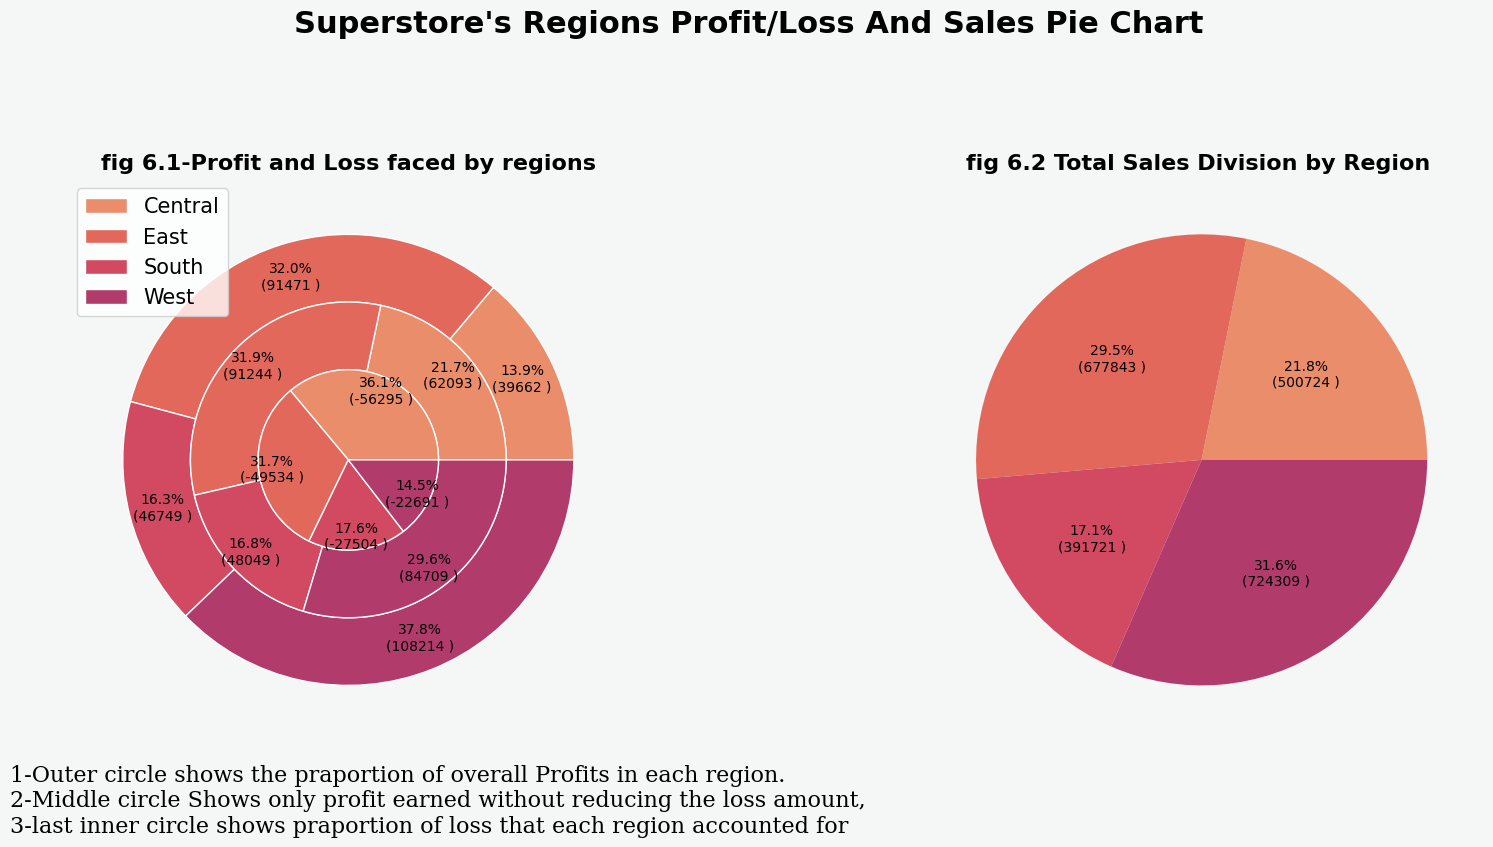

In [35]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

reg=clean_data.groupby("Region")["Profit","Sales"].sum()
reg_p=clean_data[clean_data.Profit>0].groupby("Region")["Profit","Sales"].sum()
reg_l=clean_data_loss.groupby("Region")["Loss","Sales"].sum()
reg_cat=clean_data.groupby(["Region","Category"])["Unit Price"].mean().reset_index()

fig, axs = plt.subplots(1,2,figsize=(15,9))
plt.gcf().set_facecolor('#f5f6f6')

size=0.3
axs[0].pie(reg.Profit,radius=1,colors=palette_color,
             wedgeprops=dict(width=size, edgecolor='w'),
              autopct=  lambda pct: func(pct, reg["Profit"]),
             pctdistance=(1-size/2))

axs[0].pie(reg_p.Profit,radius=1-size,colors=palette_color,
             wedgeprops=dict(width=size, edgecolor='w'),
             autopct=  lambda pct: func(pct, reg["Profit"]),
             pctdistance=(1-size/2))

axs[0].pie(reg_l.Loss*-1,radius=1-size-size,colors=palette_color,
             wedgeprops=dict( edgecolor='w'),
             autopct=  lambda pct: func(pct, reg_l["Loss"]),
             pctdistance=(1-size/2))

axs[0].legend(reg.index, fontsize=15)
axs[0].text(-1.50,-1.65, "1-Outer circle shows the praportion of overall Profits in each region.\n2-Middle circle Shows only profit earned without reducing the loss amount,\n3-last inner circle shows praportion of loss that each region accounted for  ",{'font':'serif', 'size':16, 'weight':'normal'})
axs[0].set_title('fig 6.1-Profit and Loss faced by regions',fontsize=16,weight='bold')

axs[1].pie(reg.Sales, colors=palette_color,
              autopct =  lambda pct: func(pct, reg["Sales"]))
axs[1].set_title('fig 6.2 Total Sales Division by Region ', fontsize=16, weight='bold')

plt.suptitle("Superstore's Regions Profit/Loss And Sales Pie Chart", fontsize=22,weight='bold')


plt.tight_layout()

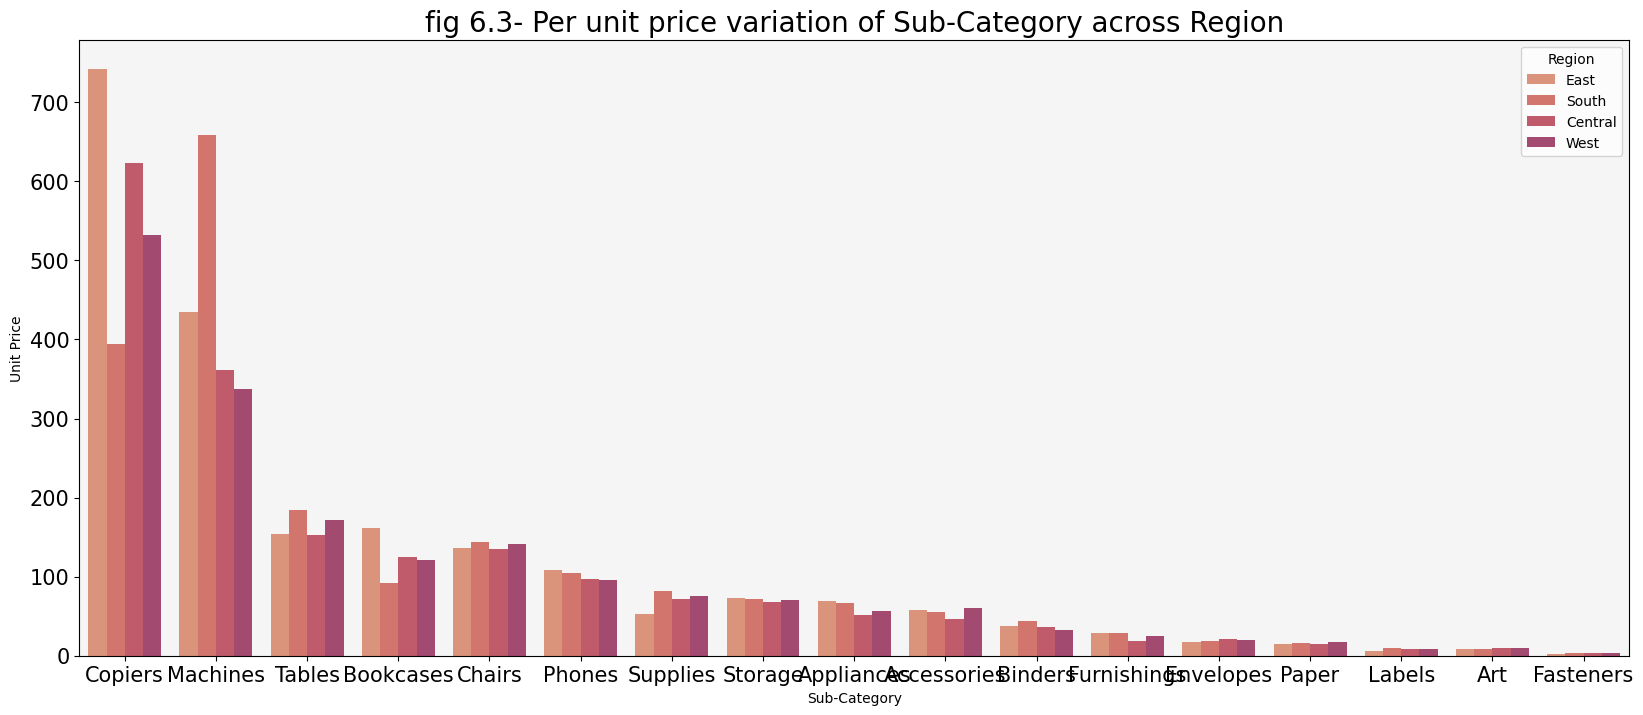

In [36]:
reg_cat=clean_data.groupby(["Region","Sub-Category"])["Unit Price"].mean().reset_index().sort_values("Unit Price",ascending=False)

fig,axs =plt.subplots(figsize=(20,8))
p = sns.barplot(data = reg_cat, x ="Sub-Category", y = "Unit Price",hue="Region", palette=palette_color)
plt.title("fig 6.3- Per unit price variation of Sub-Category across Region", fontsize=20)
axs.set_facecolor('#f6f5f5')

In [37]:
state_s=clean_data.groupby(["State","City","Category","Sub-Category"])["Sales"].sum().reset_index()
fig = px.treemap(state_s, path=["State","City","Category","Sub-Category"], values='Sales',
                  color='Sales',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(state_s['Sales'], weights=state_s['Sales']),
                title="Fig 4.1-Total State/City X Sales With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [38]:
state_profit=clean_data[clean_data.Profit>0]
state_profit=state_profit.groupby(["State","City","Category","Sub-Category"])["Profit"].sum().reset_index()
fig = px.treemap(state_profit, path=["State","City","Category","Sub-Category"], values='Profit',
                  color='Profit',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(clean_data['Profit'], weights=clean_data['Profit']),
                title="Fig 4.2-Total State/City X Profit With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [39]:
clean_data_loss["Loss"]=clean_data_loss["Loss"]*-1
state_loss=clean_data_loss.groupby(["State","City","Category","Sub-Category"])["Loss"].sum().reset_index()
fig = px.treemap(state_loss, path=["State","City","Category","Sub-Category"], values='Loss',
                  color='Loss',
                  color_continuous_scale='RdBu_r',
                  color_continuous_midpoint=np.average(state_loss['Loss'], weights=state_loss['Loss']),
                  title="Fig 4.3-Total State/City X Loss With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [40]:
# total Sales for each State
state_d = clean_data.groupby(["State","City","Category","Sub-Category"])['Discount'].mean().sort_values(ascending = False).reset_index()
state_dr= state_d[state_d.Discount>0]
fig = px.treemap(state_dr, path=["State","City","Category","Sub-Category"], values='Discount',
                  color='Discount',
                  color_continuous_scale='RdBu_r',
                  title="Fig 4.4-Average State/City X Discount  With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [41]:
# total Sales for each State
state_d = clean_data.groupby(["State","City","Category","Sub-Category"])['Discount'].mean().sort_values(ascending = False).reset_index()
state_dr = state_d[state_d.Discount>0]
fig = px.treemap(state_dr, path = ["State","City","Category","Sub-Category"], values='Discount',
                  color ='Discount',
                  color_continuous_scale='RdBu_r',
                  title = "Fig 4.4-Average State/City X Discount  With Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False

fig.update_layout(margin = dict(t = 50, l = 25, r = 25, b = 25))
fig.show()

In [42]:
state_q = clean_data.groupby(["State","City","Category","Sub-Category"])['Quantity'].sum().sort_values(ascending = False).reset_index()
fig = px.treemap(state_q, path=["State","City","Category","Sub-Category"], values='Quantity',
                  color='Quantity',
                  color_continuous_scale='RdBu_r',
                  title="Fig 4.6-Total Number of Quantity Sold Across States/City with Category & Sub-Category Distribution")
fig.data[0].textinfo = 'label+text+value'


fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()